#Data Analysis whith Python


**Autora: Leidiane Teixeira dos Reis**

Este notebook foi desenvolvido com base no curso de Data Analysis whit Python disponibilizado pela *Cognitive Class.ia* disponível em: [courses.cognitiveclass.ai](https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+DA0101EN+2017/course/). 
Ao longo do notebook são apresentados algumas funções básicas para uma análise de dados em python, que vai do carregamento e leitura dos dados até a avaliação de modelos de regressão linear.

##MÓDULO I - INTRODUÇÃO

O problema: Estimar o preço de um carro usado com base em suas características.<br/>
Conjunto de dados de automoveis 1987, disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

**P.S.** Os dados são antigos, mas nesse caso não há problemas, pois o notebok foi desenvolvido com objetivo didático.

**Obs!** Todos os comandos devem ser executados na sequência para evitar a geração de erros. 

###IMPORTAÇÃO E EXPORTAÇÃO DE DADOS


**Importação e impressão de dados**


Importação da biblioteca pandas

In [1]:
import pandas as pd

In [ ]:
#lendo o conjunto de dados do drive
df = pd.read_csv('/content/drive/My Drive/PYTHON - MACHINE LEARNING - DATA SCIENCE/DATA ANALYSIS WITH PYTHON/dados/automobileEDA.csv')

Importação e leitura do conjunto de dados

In [43]:
# header = None -> dataset não possui cabeçalho

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

#lendo o conjunto de dados do repositório
df = pd.read_csv(url, header=None)

Imprimindo conjunto de dados

In [44]:
#primeiras linhas
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [45]:
#ultimas linhas
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Podemos ver que as colunas de dados não são identificadas, e para compreender melhor os dados precisaremos conhecer o significado de cada coluna de dados. Dessa forma, vamos adicionar cabeçalhos ou seja nomes às colunas  de acordo com a documentação dos dados disponível em: [imports-85.names](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/).

In [5]:
#verificando as dimensões do conjunto de dados
df.shape

(205, 26)

Segundo a documentação o conjunto de dados é composto por 26 variáveis e 205 amostras de dados.
1. **symboling** : classificação de risco de seguro (+3 é arriscado, -3 é muito seguro.)
2. **normalized-losses**: perdas normalizadas em uso (perda média relativa de pagamento por segurado ano do veículo. )
3. **make** : fabricante 
4. **fuel-type**: tipo de combustível  (diesel, gas)
5. **aspiration**: tipo de aspiração do motor (std, turbo)
6. **num-of-doors**: número de portas (2, 4 )
7. **body-style**: estilo de carroceria (sedan, hatchback, wagon, hardtop, convertible)
8. **drive-wheels**: rodas motrizes, tipos de tração nas rodas (fwd (dianteira), rwd (traseira), 4wd (nas quatro rodas))
9. **engine-location**: localização do motor (front, rear)
10. **wheel-base**: distância entre eixos
11. **length**: comprimento
12. **width**: largura
13. **height**: altura
14. **curb-weight**: peso meio fio
15. **engine-type**: tipo de motor (ohc, ohcf, ohcv, dohc, rotor, dohcv)
16. **num-of-cylinders**: número de cilindros(two, three, four, five, six,eight, twelve)
17. **engine-size**: tamanho do motor
18. **fuel-system**: sistema de combustível (mpfi, 2bbl, idi, 1bbl, spdi, 4bbl, mfi, spfi)
19. **bore**: furo (diâmetro de cada cilindro )
20. **stroke**: curso do motor
21. **compression-ratio**: taxa de compressão
22. **horsepower**: potência, cavalos de força
23. **peak-rpm**: pico de rotações por minuto.
24. **city-mpg**: milhas por galão gastos na cidade
25. **highway-mpg**: milhas por galão gastos na rodovia
26. **price**: preço do automóvel 

Adicionando cabeçalho às colunas do conjunto de dados

In [46]:
#crie uma lista com os nomes das colunas em ordem
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [47]:
#atribua a lista às colunas do conjunto de dados
df.columns = headers

In [48]:
#visualize a alteração
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


**Exportando conjunto de dados**

Como já idenficamos as colunas do nosso conjunto de dados, vamos agora salvar esse novo conjunto de dados no formato `.csv` usando o método `.to_csv()`. Devemos passar como parâmetro o nome do arquivo.

In [10]:
df.to_csv("automobile.csv",index=False)

### Insight básicos do conjunto de dados

**Checando os tipos de dados**

`dtypes `: retorna uma série com os tipos de dados de todas as colunas do conjunto de dados. <br/>
Dessa forma, podemos verificar se os tipos de dados foram atribuidos corretamente às variáveis.


In [49]:
#check tipos de dados do dataset
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Identificamos nessa análise que alguns atributos estão com tipos que não correspondem ao seu formato real, por exemplo: <br/>
`bore, stroke, price, peak-rpm`: é do tipo `float` mas está representado como `object`<br/>
`normalized-losses`: é do tipo `int` mas está representado como `object`


**Resumo estatístico de cada coluna**


`describe()`: calcula automaticamente estatísticas básicas para todas as variáveis ​​numéricas. Mostra a média, o número total pontos de dados , o desvio padrão, os quartis e os valores extremos.


In [50]:
#resumo estatístico das colunas númericas
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


O `describe()` só trabalha com colunas númericas, para incluir as demais colunas basta utilizar
um atributo no describe: `describe(include='all')`

In [51]:
#resumo estatístico de todas as colunas
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN



A análise de tipos `object` acrescenta algumas estatísticas às demais:<br/>
`unique`: número de objetos distintos na coluna<br/>
`top`: valor mais frequente<br/>
`freq`: numero de vezes que o objeto `top` aparece na coluna<br/>
`NaN`: significa que a métrica estatística não pode ser calculada

**Resumo geral**

`info` : Este método imprime informações sobre o dataFrame incluindo o índice, nome da coluna,  valores não nulos e tipos de dados.

In [14]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make  ... city-mpg highway-mpg  price
0            3                 ?  alfa-romero  ...       21          27  13495
1            3                 ?  alfa-romero  ...       21          27  16500
2            1                 ?  alfa-romero  ...       19          26  16500
3            2               164         audi  ...       24          30  13950
4            2               164         audi  ...       18          22  17450
..         ...               ...          ...  ...      ...         ...    ...
200         -1                95        volvo  ...       23          28  16845
201         -1                95        volvo  ...       19          25  19045
202         -1                95        volvo  ...       18          23  21485
203         -1                95        volvo  ...       26          27  22470
204         -1                95        volvo  ...       19          25  22625

[205 rows x 26 colu

**Selecionado dados de colunas**

 Selecionando dados de uma única coluna




In [52]:
#selecionando os dados da coluna price
df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object



Selecionando dados de mais de uma coluna ao mesmo tempo e aplicando o resumo estatístico da coluna length e compression-ratio

In [16]:
df[['price','num-of-doors', 'engine-size']]

,price,num-of-doors,engine-size
0,13495,two,130
1,16500,two,130
2,16500,two,152
3,13950,four,109
4,17450,four,136
...,...,...,...
200,16845,four,141
201,19045,four,141
202,21485,four,173
203,22470,four,145


In [17]:
#Resumo estatístico das colunas length e compression-ratio
df[['length','compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


##MÓDULO 2 - ORGANIZAÇÃO DE DADOS

**Pré-processamento de dados**

É o processo de conversão ou mapeamento de dados de uma forma "bruta" para um formato adequado para análises posteriores.




### Lidando com valores ausentes

Os valores ausentes podem ser idetificados no conjunto de dados por: **'?'** , **N/A**, **celula em branco**, **0**.<br/>
Como lidamos com esses dados? Podemos,
*  verificar se quem coletou os dados pode voltar e descobrir o valor real;
*  remover os valores ausentes, podendo eliminar toda a coluna ou apenas a linha;
* substituir os valores ausentes:
    * pelo valor médio da coluna, quando númericos,
    * pelo valor mais comum, quando são categoricas
    * ou utilizar outras funções para isso, muitas vezes deixando o espaço ausente mesmo. 



**Identificando valores ausentes**

***Converter "?" para NaN***


No conjunto de dados, os valores ausentes são representador por um ponto de interrogação "?". Vamos substituir o  "?" por  NaN (Not a Number), que é o 
marcador de valor ausente padrão do Python, por razões de velocidade computacional e conveniência.



In [53]:
import numpy as np

# Substituir '?' por NaN
df.replace('?', np.nan, inplace=True)

In [54]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Avaliação de dados ausentes**

Com os  valores ausentes convertidos para o padrão do Python, podemos usar as funções integradas do Python para identificar esses valores ausentes. 
Existem dois métodos para detectar dados ausentes:
1. isnull()
2. notnull()

A saída é um valor booleano que indica se o valor que é passado para o argumento contém de fato dados ausentes.



In [55]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False




**"True"** significa valor ausente, enquanto **"False"** significa valor não ausente.




**Contando os valores ausentes em cada coluna**

Usando um loop for em Python, podemos descobrir rapidamente o número de valores ausentes em cada coluna. Conforme mencionado acima, "True" 
representa um valor ausente, "False" significa que o valor está presente no conjunto de dados. No corpo do loop for, o método `.value_counts ()` conta o número de valores "True".



In [56]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa


Com base no resumo acima, cada coluna tem 205 linhas de dados, sete colunas contendo dados ausentes:
1. "normalized-losses": 41 dados ausentes
2. "num-of-doors": 2 dados ausentes
3. "bore": 4 dados ausentes
4. "stroke": 4 dados ausentes
5. "horsepower": 2 dados ausentes
6. "peak-rpm": 2 dados ausentes
7. "price": 4 dados ausente



**Lidando com os valores ausentes**

Como lidar com dados ausentes?
1. Eliminar os dados <br>
   a. elimine toda a linha<br>
   b. elimine a coluna inteira
2. substituir dados<br>
  a. substitua-os pelo valor médio<br>
  b. substitua-os pela frequência<br>

Colunas inteiras devem ser eliminadas apenas se a maioria das entradas na coluna estiver vazia. Em nosso conjunto de dados, nenhuma das colunas 
está vazia o suficiente para ser totalmente descartada.



**SUBSTITUIR DADOS AUSENTES**


`replace(missing_value, new_value)`: substitui o valor ausente por um novo valor.

Para lidar com os dados ausentes do conjunto de dados no qual estamos trabalhando vamos aplicar:<br>
Substituição pela média em: 
* normalized-losses
* stroke
* bore
* horsepower
* peak-rpm

Substituição pela frequência em :<br>
* num-of-doors




***Substituição pela média***

O processo pode ser feito em dois passos:
* calcule a média da coluna de dados
* substitua o valor ausente NaN pela média da coluna usando o método .replace().

normalized-losses

In [57]:
mean_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print('Média de normalized-losses',mean_norm_loss)

df['normalized-losses'].replace(np.nan, mean_norm_loss, inplace=True)

Média de normalized-losses 122.0


stroke

In [58]:
mean_stroke = df['stroke'].astype('float').mean(axis=0)
print('Média de stroke',mean_stroke)

df['stroke'].replace(np.nan, mean_stroke, inplace = True)

Média de stroke 3.2554228855721337


bore

In [59]:
mean_bore = df['bore'].astype('float').mean(axis=0)
print('Media de bore', mean_bore)

df['bore'].replace(np.nan, mean_bore, inplace=True)

Media de bore 3.3297512437810957


horsepower

In [60]:

mean_horsepower = df['horsepower'].astype('float').mean(axis=0)
print('Média de horsepower', mean_horsepower)

df['horsepower'].replace(np.nan, mean_horsepower, inplace=True)

Média de horsepower 104.25615763546799


peak-rpm

In [61]:
mean_peak = df['peak-rpm'].astype('float').mean(axis=0)
print('Média peak-rpm', mean_peak)

df['peak-rpm'].replace(np.nan, mean_peak, inplace=True)

Média peak-rpm 5125.369458128079


***Substituição por frequência***

O processo pode ser feito em dois passos:
* verifique o item mais frequente da coluna de dados.
* substitua o valor ausente NaN pelo valor mais frequente da coluna usando o método .replace().

num-of-doors

In [62]:
print(df['num-of-doors'].value_counts())
print(df['num-of-doors'].value_counts().idxmax())

df['num-of-doors'].replace(np.nan, 'four', inplace=True)

four    114
two      89
Name: num-of-doors, dtype: int64
four


**REMOVER DADOS AUSENTES**


`dropna`: permite remover dados ausentes, tanto linhas como colunas
* remover linhas, axis = 0
* remover colunas, axis = 1
* inplace = True : permite fazer a alteração diretamente no conjunto de dados (grava o resultado de volta no dataframe)



Elimine todas as linhas que contém dados ausentes de preço da coluna `price`

In [63]:
#Eliminar todas as linhas NAN que não tem dados
df.dropna(subset= ['price'], axis=0, inplace=True)

In [64]:
#Resetar o indice por foram removidas linhas
df.reset_index(drop=True, inplace=True)

### Formatação de Dados

A formatação de dados significa trazer os dados para um padrão comum de expressão que nos permita fazer comparações significativas.

**Tipos de dados incorretos - Conversão**

Na análise de tipos de dados feita no inicio desse notebook percebemos por exemplo que a variável 'price' é do tipo object quando na verdade seus valores são numéricos. 
Assim, para analises futuras é importante converter essas variáveis para seus tipos corretos de dados.
A última etapa da limpeza de dados é verificar e certificar-se de que todos os dados estejam no formato correto (int, float, texto ou outro).

No pandas os métodos: 
* .dtypes :  checar os tipos de dados
* .astype():  mudar os tipos de dados



In [65]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


Vamos converter para o tipo correto de dados as variáveis:
* `object` para `float` : bore, stroke, price, peak-rpm
*` object` para `int` : normalized-losses

Price

In [66]:
df[['price']] = df[['price']].astype('float')

bore , stroke, peak-rpm

In [67]:
#Converte as variáveis  de object para float
df[['bore', 'stroke','peak-rpm']] = df[['bore', 'stroke','peak-rpm']].astype('float')

normalized-losses

In [68]:
#Converte a variável 'normalized-losses' de object para int
df[['normalized-losses']] = df[['normalized-losses']].astype('int')

Verificando a conversão de tipos de dados

In [69]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Padronização de dados**

Padronização é o processo de transformar os dados em um formato comum que nos permita fazer comparações significativas.

Por exemplo: as pessoas podem usar diferentes formas de expressar a cidade de Nova York, ny, Ny, NY.  
Para algumas análises isso não é um  problema, mas para outras é preciso colocar todas essas formas em um padrão único.




***Transforme mpg para L / 100km:***

Em nosso conjunto de dados, as colunas de consumo de combustível "city-mpg" e "highway-mpg" são representadas pela unidade de
mpg (milhas por galão). Suponha que estejamos desenvolvendo uma aplicação em um país que aceita o consumo de combustível com o padrão L / 100km. 
Precisaremos aplicar a transformação de dados para transformar mpg em L / 100km.



Faça a conversão e armazene em uma nova coluna de dados.

In [70]:
#city-mpg - Conversão mpg -> L/100km

df['city-L/100km'] = 235/df['city-mpg']

Faça a conversão e armazene na mesma coluna de dados renomeando-a.

In [71]:
#city-mpg - Conversão mpg -> L/100km
#substitui / renomeia a coluna 'city-mpg' para 'city-L/100km'
df['city-mpg'] = 235/df['city-mpg']

#renomea a coluna
df.rename(columns={'city-mpg': 'city-L/100km'}, inplace=True)

In [72]:
#highway-mpg - Conversão mpg -> L/100km
df['highway-mpg'] = 235/df['highway-mpg']

#renomea a coluna
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

In [73]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,13.055556


###Normalização de dados


Normalização é o processo de transformar valores de várias variáveis ​​em um intervalo semelhante. 

As normalizações típicas incluem:
*  dimensionar a variável para que a média da variável seja 0, 
* dimensionar a variável para que a variância seja 1, ou,
* dimensionar a variável para que os valores das variáveis ​​variem de 0 a 1.


Por exemplo, as variáveis age(idade) e income(renda) tem uma grande variação em seus intervalos:
* age : [0-100]
* income: [20.000 - 500.000]

A renda é cerca de 1.000 vezes maior que a idade. Estão em intervalos muito diferentes. Quando fazemos análises adicionais, como regressão 
linear, por exemplo, o atributo "renda" influenciará intrinsecamente mais o resultado, devido ao seu maior valor, mas isso não necessariamente
significa que é mais 'importante' como um preditor.

Para evitar isso, podemos normalizar essas duas variáveis ​​em valores que variam de 0 a 1.
Ao tornar os intervalos consistentes entre as variáveis, a normalização permite uma comparação mais justa entre os diferentes recursos.

**TÉCNICAS DE NORMALIZAÇÃO**

**1. Escala de rescursos simples - simple feauture scaling**

Essa técnica divide cada valor da variável pelo valor máximo da mesma, isso faz com os valores variem entre 0 e 1.

**x_new = x_old/x_max**




In [74]:
#normalizando a variável length, width e height com simple feauture scaling
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max() 

In [75]:
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


**2. Min-Max**

Nesse método, cada valor da variável é subtraído do valor mínimo e dividivo pelo valor máximo menos o mínimo. Novamente os valores vão variar entre 0 e 1.

**x_new = (x_old - x_min) / (x_max -x_min)**





In [ ]:
#normalizando a variável length com min-max
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())


**3. Z-Score - Pontuação Z**

Para cada valor você subtrai a média da variável(u) e depois divide pelo desvio padrão o(sigma). Os valores resultantes oscilam em torno de zero e variam entre -3 e +3

**x_new = (x_old - u) / o**



In [40]:
#normalizando a variável length com Z-score
df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()


###Binning in Python


**Binning** é quando você agrupa valores em compartimentos. Por exemplo, você pode dividir a  “idade” em [0 a 5], [6 a 10], [11 a 15] e assim por diante.
Às vezes, o binning pode melhorar a precisão dos modelos preditivos.

Além disso, às vezes usamos binning de dados para agrupar um conjunto de valores numéricos em um menor número de caixas para ter uma melhor 
compreensão da distribuição dos dados.

Como exemplo, “preço” aqui é um intervalo de atributos de 5.000 a 45.500. Usando binning, categorizamos o preço em três categorias: 
* preço baixo
* preço médio 
* preço alto


**Exemplo 1:**

No conjunto de dados do carro real, "preço" é uma variável numérica que varia de 5188 a 45400, tem 201 valores únicos.
Podemos categorizá-los em 3 categorias: carros de baixo(low), médio(medium) e alto (high) preço.

Em Python, podemos implementar facilmente o binning: gostaríamos de 3 bins de largura igual, então precisamos de 4 números como divisores com distâncias iguais.


Primeiro, usamos a função numpy "linspace" para retornar a matriz "bins" que contém 4 números igualmente espaçados sobre o intervalo 
especificado do preço.


In [76]:
import numpy as np
#erro porque ainda não eliminei os valores ausentes nem converti price

bins = np.linspace(min(df['price']), max(df['price']), 4)



Criamos uma lista “group_names“ que contém os diferentes nomes de bin.



In [77]:
group_names = ["Low","Medium","High"]


Usamos a função "cut" do pandas para segmentar e classificar os valores dos dados em caixas.



In [78]:
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)

**Exemplo 2:**

Em nosso conjunto de dados, "horsepower" é uma variável de valor real variando de 48 a 288, tem 57 valores únicos. E se nos 
preocupássemos apenas com a diferença de preço entre carros com alta, média e pequena potência (3 tipos)? Podemos reorganizá-los em três 
'caixas' para simplificar  a análise?

1º - Converter o dado para o formato correto



In [79]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)


Vamos traçar o histograma da horsepower, para ver como é a distribuição da potência.

Text(0.5, 1.0, 'horsepower bins')

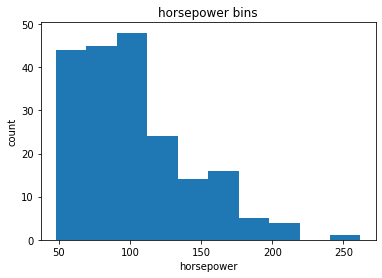

In [80]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


Gostaríamos de 3 bins de largura de banda de tamanho igual, então usamos a linspace(start_value, end_value, numbers_generated) função de numpy .

Como queremos incluir o valor mínimo de cavalos de força, queremos definir
start_value = min (df ["horsepower"]).

Como queremos incluir o valor máximo de cavalos de força, queremos definir
end_value = max (df ["horsepower"]).

Como estamos construindo 3 caixas de igual comprimento, deve haver 4 divisores, portanto, 
numbers_generated = 4.



In [81]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])


Definimos nomes de grupo:



In [82]:
group_names = ['Low', 'Medium', 'High']


Aplicamos a função "cut" para determinar a que cada valor de "df['horsepower']" pertence.




In [83]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64


Vamos plotar a distribuição de cada caixa.



Text(0.5, 1.0, 'horsepower bins')

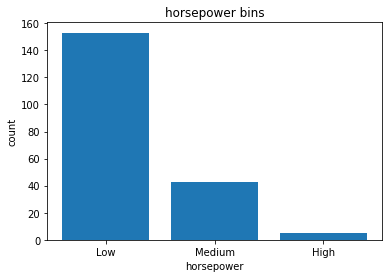

In [84]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [85]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km,price-binned,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,11.190476,Low,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,11.190476,Low,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,12.368421,Low,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,9.791667,Low,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,13.055556,Low,Low


###Transformando variáveis ​​categóricas em variáveis ​​quantitativas


A maioria dos modelos estatísticos não aceitam objects ou strings como entradas para o treinamento do modelo, aceitam apenas números.

Esta técnica é frequentemente chamada de `codificação one-hot`. No pandas, podemos usar o método `get_dummies()` para converter variáveis 
​​categóricas em variáveis numéricas.



No nosso conjunto de dados , o recurso "tipo de combustível (`fuel-type`)" como uma variável categórica tem dois valores, `"gas"` ou `"diesel"`, que estão no 
formato String. Para uma análise posterior, precisamos converter essas variáveis ​​em outro formato.

Codificamos os valores adicionando novos recursos correspondentes a cada elemento único no característica original que gostaríamos de codificar.

* no caso em que o recurso "Combustível" tem dois valores únicos, gás e diesel, criamos dois novos recursos 'gás' e 'diesel'.
* Quando um valor ocorre no recurso original, definimos o valor correspondente para 1 no novo recurso; o restante dos recursos é definido 
como 0 (zero).


Obter variáveis ​​indicadoras e atribuí-las ao quadro de dados "dummy_variable_1"

In [86]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1



Mudar os nomes das colunas para maior clareza.

In [87]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1



Agora temos o valor 0 para representar "gás" e 1 para representar "diesel" na coluna "fuel-type", amos inserir esta coluna de 
volta em nosso conjunto de dados original.



In [88]:
# mesclando o  "df" e "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# eliminando a coluna original "fuel-type" do "df"
df.drop("fuel-type", axis = 1, inplace=True)



Apagando algumas colunas criadas com binning desnecessárias para o conjunto de dados



In [89]:
df.drop("price-binned", axis = 1, inplace=True)

In [90]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,11.190476,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,11.190476,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,9.791667,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,13.055556,Low,0,1



Crição da variável indicadora para a coluna de "aspiration": "std" para 0, enquanto "turbo" para 1

In [91]:
# Obter variáveis ​​indicadoras e atribuí-las ao quadro de dados "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# Mudar o nome das colunas
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# visualizando a variável "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0



Mesclando o novo dataframe com o dataframe original e, eliminando a coluna 'aspiration'



In [92]:
#mescalndo o novo dataframe ao original
df = pd.concat([df, dummy_variable_2], axis=1)

# eliminado a coluna original "aspiration" do "df"
df.drop('aspiration', axis = 1, inplace=True)


###Salvando o novo dataset - limpo, formatado e normalizado


Salvando o novo datset limpo e normalizado - o novo csv


In [ ]:
df.to_csv('clean_df.csv')

##MÓDULO 3 - ANÁLISE EXPLORATÓRIA DE DADOS


É uma abordagem para analisar dados a fim de:
- resumir as principais características dos dados 
- obter melhor compreensão do conjunto de dados,
- descobrir relações entre diferentes variáveis, e
- extrair variáveis ​​importantes para o problema que estamos tentando resolver.

A principal questão que estamos tentando responder neste módulo é: **“Quais são as características que têm mais impacto no preço do carro?”**
Quando você começa a analisar dados, é importante primeiro explorar seus dados antes de gastar tempo construindo modelos complicados.
Uma maneira fácil de fazer isso é calcular algumas estatísticas descritivas para seus dados. 



###Estatística Descritiva


A análise estatística descritiva ajuda a descrever os recursos básicos de um conjunto de dados e a obter um breve resumo sobre a amostra e as 
medidas dos dados.


**MÉTODOS** <br/>

***Describe()*** 

calcula automaticamente estatísticas básicas para todas as variáveis ​​numéricas. Mostra a média, o número total pontos de dados , o desvio padrão,
os quartis e os valores extremos.


In [93]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


***value_counts()***

A contagem de valores é uma boa maneira de entender quantas unidades de cada característica da variável temos.

`value_counts()`: é uma maneira de resumir **variáveis categóricas** ou grupos.
Não se esqueça que o método "value_counts" só funciona na série Pandas, não nos Dataframes do Pandas.
Por exemplo: A variável drive-wheels possui algumas categorias que correspondem ao tipo de tração da roda do carro, analisando-a ....



In [95]:
#resumo da variável divre-wheels
dwcounts = df['drive-wheels'].value_counts()

print(dwcounts)

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


In [ ]:
#converter em frame
df['drive-wheels'].value_counts().to_frame()


Esse resumo mostra que temos:
- 118 carros na categoria fwd, com tração dianteira
- 75 rwd com tração traseira, e
- 8 4wd com tração nas 4 rodas.


Vamos repetir os passos acima, mas salvar os resultados no dataframe "drive_wheels_counts" e renomear a coluna 'drive-wheels' para 'value_counts'


In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts


Agora vamos renomear o índice para 'drive-wheels':

In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Podemos repetir o processo acima para a variável 'engine-location'.

In [96]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3



Examinando as contagens de valor da localização do motor(engine-location) percebe-se que ela não seria uma boa variável de previsão para o preço. Isso porque temos apenas 
três carros com motor traseiro e 198 com motor dianteiro, esse resultado é distorcido. Assim, não podemos tirar nenhuma conclusão sobre a
localização do motor.

***Box Plots***

As **variáveis categóricas** são variáveis ​​que descrevem uma 'característica' de uma unidade de dados e são selecionadas a partir de um pequeno 
grupo de categorias. As variáveis ​​categóricas podem ser do tipo "objeto" ou "int64". 
Uma boa maneira de visualizar variáveis ​​categóricas é 
usando **boxplots**, que nos permite visualizar as várias distribuições dos dados.
As principais características que o boxplot mostram são:
- a mediana dos dados, que representa onde o ponto de dados do meio;
- o quartil superior mostra onde o 75º percentil;
- o quartil inferior mostra onde está o 25º percentil. 
- outliers como pontos individuais que ocorrem fora do e extremos inferiores.




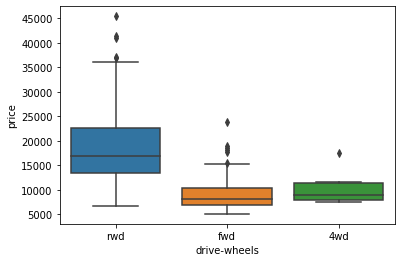

In [97]:
#importe a biblioteca seaborn
import seaborn as sns

#plotae a distibuição dos dados da varável drive-wheels em relação ao preço
sns.boxplot(x='drive-wheels', y= 'price', data=df)


Neste exemplo, usando Boxplot, vemos a distribuição de diferentes categorias do recurso "drive-wheels" sobre o preço. 
Podemos ver que a distribuição de preço entre o rwd (tração traseira) e as outras categorias são distintas, mas o preço para fwd (tração dianteira) e 
4wd (tração nas quatro rodas) são quase indistinguíveis.

Aqui vemos que a distribuição de preço entre as diferentes categorias de rodas motrizes(drive-wheels); como tal, as rodas motrizes podem ser um 
indicador de preço.




Vejamos a relação entre **body-style** e **price**


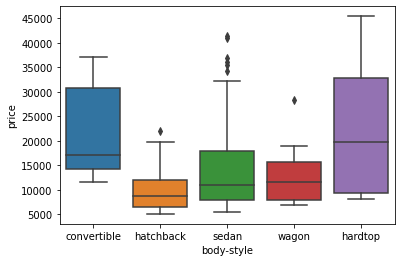

In [98]:
sns.boxplot(x='body-style', y='price', data=df)


Vemos que as distribuições de preço entre as diferentes categorias do body-style têm uma sobreposição significativa e, portanto, o body-style 
não seria um bom preditor de preço.

Vamos examinar a **localização do motor(engine-location)** e o **preço (price)**

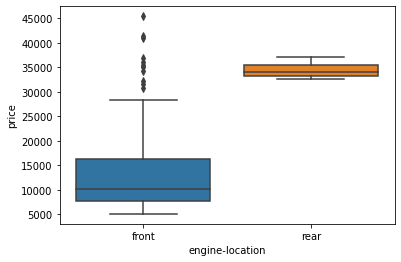

In [99]:
sns.boxplot(x='engine-location', y='price', data=df)


Aqui, vemos que a distribuição de preço entre essas duas categorias de localização do motor, dianteira e traseira, são distintas o suficiente 
para considerar a localização do motor como um bom indicador de preço em potencial.


***Scatter Plot***

Nos permite entender a relação entre **variáveis continuas** que geralmente estão contidas em um intervalo. Por exemplo, se quisermos entender a 
relação entre 'tamanho do motor'(engine-size) e o 'preço'(price) do carro. O tamanho do motor poderia prever o preço de um carro?

Cada observação em um gráfico de dispersão é representada como um ponto. Este gráfico mostra a relação entre duas variáveis:
- preditora: é a variável que você está usando para prever um resultado. Nossa variável preditora é o tamanho do motor.
- destino: é a variável que você está tentando prever. Nossa variável alvo é o preço, pois esse seria o resultado.

Em um gráfico de dispersão, normalmente definimos a variável preditora no eixo x, ou eixo horizontal e definimos a variável de destino no eixo y ou eixo vertical.



Text(0.5, 0, 'Engine size')

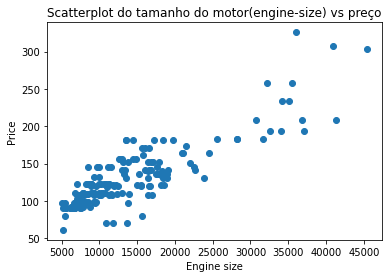

In [100]:
#usamos a biblioteca matplotlib para plotar gráficos de dispersão
import matplotlib.pyplot as plt

#definimos os eixos
y = df['engine-size']
x = df['price']

#plotamos o gráfico
plt.scatter(x,y)

plt.title('Scatterplot do tamanho do motor(engine-size) vs preço')
plt.ylabel('Price')
plt.xlabel('Engine size')


No gráfico de dispersão, vemos que conforme o tamanho do motor aumenta, o preço do carro também aumenta. Isso está nos dando uma indicação 
inicial de que existe uma relação linear positiva entre essas duas variáveis.

###GroupBy - Agrupamento


Suponha que você queira saber: 

Existe alguma relação entre os diferentes tipos de "sistema de acionamento"(tração dianteira, traseira e 
nas quatro rodas) e o “preço” dos veículos? 
Em caso afirmativo, que tipo de “sistema de acionamento” agrega mais valor a um veículo?

Seria bom se pudéssemos agrupar todos os dados pelos diferentes tipos de rodas motrizes, e comparar os resultados dessas diferentes rodas
motrizes(drive-wheels) entre si.
No pandas isso pode ser feito utilizando o método

***groupby()***

O método de agrupamento é usado em variáveis ​​categóricas, agrupa os dados em subconjuntos de acordo às diferentes categorias  dessa variável. Você pode agrupar por uma única variável ou por várias variáveis ​​passando em vários nomes de variáveis.


Por exemplo, vamos agrupar pela variável drive-wheels

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Extraia as variáveis que serão utilizadas

In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

Calcule o preço médio para cada uma das diferentes categorias de dados.

In [ ]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333



Por exemplo, digamos que estamos interessados ​​em encontrar o preço médio dos veículos e observar como eles diferem entre os diferentes tipos de
"estilos de carroceria"(body-style) e "rodas motrizes"(drive-wheels) variáveis.




In [ ]:
#Extraia os valores das variáveis
df_test = df[['drive-wheels', 'body-style', 'price']]

In [ ]:
#Agrupe os dados reduzidos de acordo com drive-wheels e body-style
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()

In [ ]:
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286



Os dados agora estão agrupados em subcategorias e apenas o preço médio de cada subcategoria é mostrado.
Podemos ver que, de acordo com nossos dados, conversíveis com tração traseira e  os hardtops com tração traseira têm o valor mais alto, enquanto 
os hatchbacks com tração nas quatro rodas têm o valor mais baixo.



***pivot()***

Possibilita a criação de tabelas dinâmicas.
Abaixo exibiremos a variável body-style ao longo das colunas e drive-wheels ao longo das linhas.



In [ ]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')


grouped_pivot = df_pivot.fillna(0) #preencha os valores ausentes com zero
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]


Use a função "groupby" para encontrar o "preço" médio de cada carro com base no "estilo da carroceria" (body-style)?



In [ ]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


***Heatmap - mapa de calor***

É outra forma de criar tabelas dinâmincas. O mapa de calor pega uma grade retangular de dados e atribui uma intensidade de cor com base no
valor dos dados nos pontos da grade.




Neste exemplo, usamos o método `pcolor` do `pyplot` para plotar um mapa de calor e converter o tabela dinâmica anterior em um formato gráfico.
Especificamos o esquema de cores vermelho-azul. 

No gráfico de saída, cada tipo de "body-style" é numerado ao longo do eixo x, e cada tipo  de “rodas motrizes”("drive-wheels") é numerado ao longo do eixo y. Os preços médios são plotados com cores variadas com base em seus valores, de acordo com
a barra de cores. Vemos que a seção superior do mapa de calor parece ter preços mais altos do que a inferior seção.



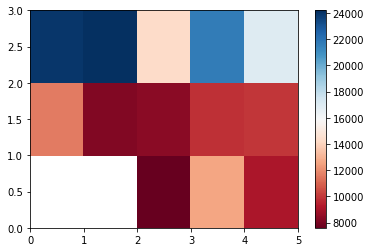

In [ ]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


O mapa de calor representa a variável alvo (preço) proporcional à cor em relação às variáveis ​​'roda motriz'(drive-wheels) e 'estilo da carroceria'(body-style) nos 
eixos vertical e horizontal, respectivamente. Isso nos permite visualizar como o preço está relacionado a 'roda motriz' e 'estilo de carroceria.

Os rótulos padrão não transmitem informações úteis para nós. Vamos mudar isso:



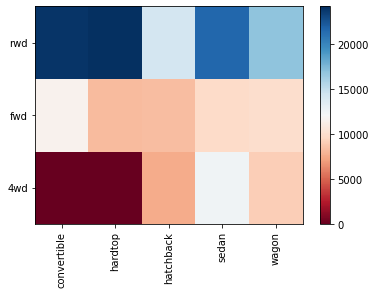

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#nomes dos rótulos
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#mova marcas e rótulos para o centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#inserir rótulos
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#gire o rótulo se for muito longo
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

###ANOVA - Análise de variância


**Analisys Of VAriance(ANOVA)** - pode ser usada para encontrar a correlação entre diferentes grupos de uma categoria. Retorna dois valores:
- F-test : calcula a razão da variação entre a média dos grupos sobre a varição dentro de cada um dos grupos de amostras. 
   - F-score pequeno indica uma correlação fraca e 
   -  F-score grande forte correlação
- p-value: Mostra se o resultados é estatisticamente significativo



Por exemplo, considere o conjunto de dados, a pergunta que podemos fazer é como as diferentes categorias do recurso Make (como uma 
variável categórica) tem impacto no preço?

Vamos fazer uma analise de variância entre as fabricantes(make) "Honda" e "Subaru"


ANOVA entre "honda" e "subaru"

Extrair dados do preço e fabricante

In [ ]:
from scipy import stats

df_anova = df[['make', 'price']]

Agrupamos os dados por diferentes fabricantes

In [ ]:
grp_anova = df_anova.groupby(['make'])

O teste ANOVA pode ser executado em Python usando o método f_oneway como o função do pacote Scipy. 

Passamos os dados de preços dos dois grupos de fabricantes de carros que queremos comparar e calcula os resultados da ANOVA.

In [ ]:
anova_r_1 = stats.f_oneway(grp_anova.get_group("honda")['price'],grp_anova.get_group("subaru")['price'])
anova_r_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


Os preços entre Hondas e Subarus não são significativamente diferentes, como a pontuação F-test  é menor que 1 e o valor de p é maior que 0,05.



Uma vez que ANOVA analisa a diferença entre grupos diferentes da mesma variável, a função groupby será útil. Como o algoritmo ANOVA calcula a
média dos dados automaticamente, não precisamos fazer a média antes.

Vamos ver se diferentes tipos de 'rodas motrizes'(drive-wheels) impactam o 'preço', agrupamos os dados.

In [ ]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]

In [ ]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0



Podemos obter os valores do grupo de métodos usando o método "get_group".


In [ ]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64


podemos utilizar a função '`f_oneway`' do módulo '`stats`'  para obter a pontuação F-test e P-value .

In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23



Este é um ótimo resultado, com uma grande pontuação no F-test mostrando uma forte correlação e um valor P de quase 0 implicando em 
significância estatística quase certa. Mas isso significa que todos os três grupos testados são altamente correlacionados?


Separadamente: fwd e rwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23



4wd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333



4wd and fwd

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


###Correlação


Correlação é uma métrica estatística para medir o quanto as diferentes variáveis ​​são interdependentes. Em outras palavras, quando 
olhamos para duas variáveis ​​ao longo do tempo, se uma variável muda, como isso afeta a mudança na outra variável?

Vejamos a correlação entre o tamanho do motor(engine-size) e o preço(price).


***.corr()***

Podemos calcular a correlação entre variáveis ​​do tipo "int64" ou "float64" usando o método "corr".

Os elementos diagonais são sempre um;
`

In [ ]:
#calculando a correlação entre todas as variáveis do dataset
df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233



Encontre a correlação entre as seguintes colunas: **bore, stroke,compression-ratio and horsepower.**

In [ ]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


***Tipos de correlação - visualização e compreensão***

Para começar a compreender a relação (linear) entre uma variável individual e o preço. Podemos fazer isso usando **"regplot"**, que plota o gráfico
de dispersão mais a linha de regressão ajustada para os dados.




***Exemplo 1 - Correlação positiva***

Vejamos a correlação entre **engine-size** e **price**. O objetivo principal deste gráfico é ver se o tamanho do motor
tem algum impacto no preço.



(0.0, 53210.34071520043)

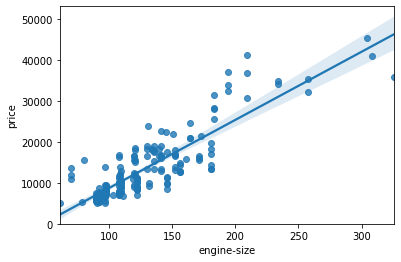

In [ ]:
#vamos usar um scatter plot para isso, usaremos o regplot - plota os dados como uma regressão linear
sns.regplot(x='engine-size', y='price', data=df)

plt.ylim(0,)


À medida que o tamanho do motor aumenta, o preço sobe: isso indica uma correlação direta positiva entre essas duas variáveis. 

O tamanho do motor parece um bom preditor de preço, já que a linha de regressão é quase uma linha diagonal perfeita.
Podemos examinar a correlação entre 'tamanho do motor' e 'preço' e ver que é aproximadamente 0,87

In [ ]:
#correlação entre o engine-size e o price
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


***Exemplo 2 - Correlação negativa***

Agora vamos olhar para a relação entre **highway-mpg** e **price** para ver seu impacto no preço do carro.


(0.0, 48175.37188986153)

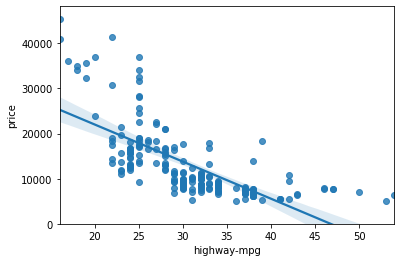

In [ ]:
sns.regplot(x='highway-mpg',y='price', data=df)
plt.ylim(0,)


Como podemos ver neste gráfico, quando o valor highway-mpg aumenta, o valor do preço diminui. Portanto, há uma relação linear negativa entre highway-mpg e price. 

Embora esta relação seja negativa, a inclinação da linha é íngreme o que significa que as highway-mpg ainda são um bom indicador de preço.

Podemos examinar a correlação entre 'highway-mpg' e 'preço' e ver que é aproximadamente -0,704



In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000



***Exemplo 3 - Correlação fraca***

Vamos analisar a correlação entre as variáveis **peak-rpm** e **price**



(0.0, 47414.1)

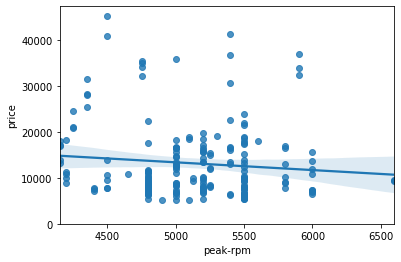

In [ ]:
sns.regplot(x='peak-rpm',y='price', data=df)
plt.ylim(0,)

peak-rpm não parece ser um bom preditor do preço, pois a linha de regressão está próxima da horizontal. Além disso, os pontos de dados 
estão muito dispersos e distantes da linha ajustada, apresentando grande variabilidade. Portanto, não é uma variável confiável.
Podemos examinar a correlação entre 'peak-rpm' e 'preço' e ver que é aproximadamente -0,101616




In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000



Analisando a correlação entre **stroke** e **price**. 
Primeiro calcule a correlação e depois plote o `regplot()`

In [ ]:
#Verificando a correlação entre stroke e price
df[['stroke','price']].corr()

#A correlação é de 0.082269

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


(0.0, 47414.1)

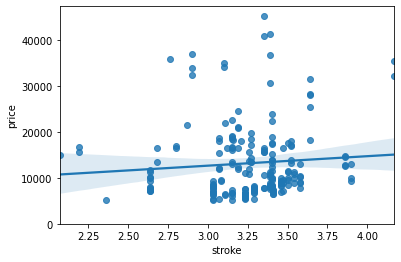

In [ ]:
sns.regplot(x='stroke', y='price', data=df)
plt.ylim(0,)

###Correlação Estatística /Avançada





**Correlação X Causalidade**

*Correlação* : uma medida da extensão da interdependência entre as variáveis.

*Causalidade* : a relação entre causa e efeito entre duas variáveis.

É importante saber a diferença entre os dois e que a correlação não implica causalidade. Determinar a correlação é muito mais simples do que 
determinar a causalidade, já que a causalidade pode exigir experimentação independente.

**Correlação de Pearson**

A correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y.
O coeficiente resultante é um valor entre -1 e 1. 
É uma maneira de medir a força da correlação entre variável numérica contínua. O método de correlação de Pearson lhe dará dois valores: 

- o coeficiente de correlação 
    - um valor próximo a 1 implica uma grande correlação positiva,
    - um valor próximo a -1 implica uma grande correlação negativa,
    - um valor próximo a 0 não implica correlação entre as variáveis.




- Valor P : é o valor da probabilidade de que a correlação entre essas duas variáveis ​​seja estatisticamente significativa. 
  - p   <  0,001: dizemos que há fortes evidências de que a correlação é significativa.
  - p   <  0,05: há evidências moderadas de que a correlação é significativa.
  - p   <  0,1: há evidências fracas de que a correlação é significativa.
  - p   >  0,1: não há evidências de que a correlação seja significativa.


Correlação de Pearson é o método padrão da função "`.corr`". Como antes, podemos calcular a correlação de Pearson das variáveis ​​'int64' ou 
'float64'.




Podemos obter essas informações usando o módulo "`stats`" da biblioteca "`scipy`".



In [ ]:
from scipy import stats




**Horsepower vs Price**




In [ ]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre horsepower e o preço é estatisticamente significativa e a relação linear é bastante forte 
(~ 0,809, perto de 1). E assim podemos concluir  que temos certeza da forte correlação positiva.







**Wheel-base vs Price**



In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre wheel-base e preço é estatisticamente significativa, embora a relação linear 
não seja extremamente forte (~ 0,585)






**Length vs Price**





In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.016477466159328e-30



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre length e preço é estatisticamente significativa e a relação linear é 
moderadamente forte (~ 0,691).



**Width vs Price**




In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


**Conclusão:**
Como o valor p é < 0,001, a correlação entre width e preço é estatisticamente significativa e a relação linear é bastante forte (~ 0,751).





**Curb-weight vs Price**



In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre curb-weight e preço é estatisticamente significativa e a relação linear é bastante forte (~ 0,834).






**Engine-size vs Price**




In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre engine-size e preço é estatisticamente significativa e a relação linear é 
é bastante forte (~ 0,872).






**Bore vs Price**




In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17



**Conclusão:**
Uma vez que o valor p é  <  0,001, a correlação entre bore e preço é estatisticamente significativa, embora a relação linear 
não seja extremamente forte (~ 0,543)





**City-mpg vs Price**



In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567641e-29


**Conclusão**
Como o valor p é < 0,001, a correlação entre city-mpg e o preço é estatisticamente significativa, e o coeficiente de (~ -0,686) mostra que 
a relação é negativa e moderadamente forte.






**Highway-mpg vs Price**




In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31



**Conclusão:**
Como o valor p é < 0,001, a correlação entre highway-mpg e o preço é estatisticamente significativa, e o coeficiente de (~ -0,705) mostra que 
a relação é negativa e moderadamente forte.


###Conclusão: Variáveis ​​Importantes

Agora temos uma ideia melhor de como são os nossos dados e quais variáveis ​​são importantes levar em consideração ao prever o preço do carro. Nós o restringimos às seguintes variáveis:

Variáveis ​​numéricas contínuas:

* length
* width
* curb-weight
* engine-size
* horsepower
* city-mpg
* highway-mpg
* wheel-base
* bore

Variáveis ​​categóricas:

* drive-wheels

À medida que avançamos para a construção de modelos de aprendizado de máquina para automatizar nossa análise, alimentar o modelo com variáveis ​​que afetam significativamente nossa variável de destino melhorará o desempenho de previsão de nosso modelo.

##MÓDULO 4 - DESENVOLVIMENTO DO MODELO


Examinaremos o desenvolvimento do modelo tentando prever o preço de um carro usado.
E como você pode determinar o valor justo de um carro usado?

* Modelo: um modelo ou estimador pode ser pensado como uma equação matemática usada para prever um valor dado um ou mais outros valores. 

Relacionar uma ou mais variáveis ​​independentes ou recursos com variáveis ​​dependentes.

Por exemplo:
```
     variáveis independentes                           Variavel dependente
       'highway-mpg' ----------->     MODELO   ----------> 'price'
          55 mpg                                           $5000
```
Normalmente, quanto mais dados relevantes você tiver, mais preciso será o seu modelo.
```
     variáveis independentes                           Variavel dependente
         'highway-mpg'                                        'price'
         'curb-weight' ===========>   MODELO   ===========>    $5400
         'engine-size'
```                                                          


###Regressão Linear Simples e Múltipla


A **regressão linear** se refere a uma variável independente para fazer uma previsão.
```
       variável                  Linear                         
      independente  ------>    Regression    ---------->   Prediction
           x                  
```
A **regressão linear múltipla** se refere a várias variáveis ​​independentes para fazer uma previsão.
```
       múltiplas
       variáveis              Multiple Linear                         
      independentes =======>    Regression    ==========>   Prediction
       x1,.....xn                 

```



**SIMPLE LINEAR REGRESSION(SLR)**


É um método para nos ajudar a entender a relação entre duas variáveis: 
- X: variável preditora (independente) 
- y: variável resposta(alvo) (dependente)
          yhat = a + bx

- **a** : é a interceptação da linha de regressão.

- **b** : é à inclinação da linha de regressão.




Por exemplo:

É difícil descobrir quanto custa um carro, mas a variável 'highway-mpg' estão no  manual do proprietário. 
Se assumirmos, há um relação linear entre essas variáveis, podemos usar essa relação para formular um modelo para determinar o preço do carro. 

            y = 38423 - 821x
            
Se 'highway-mpg' for igual a 20, nós podemos inserir seu valor no modelo para obter uma previsão de $ 22.000.

            y = 38423 - 821 * 20
            y = 38423 - 16420
            y = 22003

**Determinar a linha (FIT)**

Para determinar a linha, pegamos pontos de dados de nosso conjunto de dados. Em seguida, usamos esses pontos de treinamento para ajustar nosso 
modelo; os resultados dos pontos de treinamento são os parâmetros. Cada amostra corresponde a uma linha diferente.



**Resumindo o processo:**

1. Temos um conjunto de pontos de treinamento;
2.  Usamos esses pontos de treinamento para ajustar ou treinar o modelo e obter os parâmetros;
3. Em seguida, usamos esses parâmetros no modelo;
4. Agora temos um modelo;
5. Podemos usar este modelo para prever valores que não vimos.

Nosso modelo nem sempre é correto. Podemos ver isso comparando o valor previsto com o valor real.


**Criando um modelo de Simple Linear Regression - SLR**


Primeiro importamos o modelo linear da biblioteca scikit-learn




In [ ]:
from sklearn.linear_model import LinearRegression


Criamos um objeto de regressão linear usando o construtor


In [ ]:
lm = LinearRegression()

**Modelo 1** 

Como a highway-mpg pode nos ajudar a prever o preço do carro?

Para este exemplo, queremos ver como a variável 'highway-mpg' pode nos ajudar a prever o preço do carro. Usando **regressão linear simples**, criaremos uma função linear com "highway-mpg" como variável preditora e o "preço" como variável de resposta.

Extraímos a variável preditora e a resposta.


In [ ]:
X = df[['highway-mpg']]
y = df['price']

Em seguida usamos método `fit` para ajustar o modelo e encontrar o parâmetros que precisamos.

In [ ]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Agora que temos os parâmetros, podemos obter uma previsão usando o método `predict`.

In [ ]:
Yhat = lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Podemos visualizar nossos parâmetros de interceptação (a) e inclinação (b).

Qual é o valor da interceptação (a)?



In [ ]:
# interceptação
lm.intercept_

38423.3058581574


Qual é o valor da inclinação (b)?

In [ ]:
#inclinação
lm.coef_

array([-821.73337832])

Usando os parâmetros encontrados, temos a representação da nossa função linear:

     price = 38423.30 - 821.73 * highway-mpg

**Modelo 2**

Treinaremos um modelo usando 'engine-size' como variável independente e 'preço' como variável dependente.

Criamos o  objeto de regressão linear `lm1` e ajustamos o modelo com a função `fit`

In [ ]:
lm1 = LinearRegression()

lm1.fit(df[['engine-size']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

A inclinação é 166.86

In [ ]:
#inclinação
lm1.coef_

array([166.86001569])

E a interceptação  -7963.34

In [ ]:
#interceptação
lm1.intercept_

-7963.338906281042

Usando os parâmetros encontrados, temos a represemtação da nossa função linear:

     price = -7963.33 - 166.86 * engine-size

**Multiple Linear Regression (MLR)**


A **regressão linear múltipla** é usada para explicar a relação entre uma variável alvo contínua (Y), e  duas ou mais variáveis ​​preditoras (X).

          Yhat= a + b1X1 + b2X2 + b3X3 + b4X4

* a : interceptação

* b1 : coeficiente ou parâmetro de 𝑋1
* b2 : coeficiente ou parâmetro de 𝑋2
* b3 : coeficiente ou parâmetro de 𝑋3
* b4 : coeficiente ou parâmetro de 𝑋4


**Criando um modelo Multiple Linear Regression - MLR**


**Modelo 1**

Da seção anterior, sabemos que outros bons preditores de preço são:
- horsepower
- curb-weight
- engine-size
- Highway-mpg

Vamos desenvolver um modelo usando essas variáveis ​​como variáveis ​preditoras.

Extraimos as 4 variáveis predidoras e armazenamos em `z`.

In [ ]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Em seguida, treinamos o modelo usando o método `fit`, com as variáveis dependentes ​​e os alvos

In [ ]:
 lm.fit(z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos obter uma previsão o método `predict`

In [ ]:
Yhat = lm.predict(z)

Visualizar o valor da interceptação

In [ ]:
lm.intercept_

-15811.863767729232

E também os valores dos parâmetros ou coeficiêntes x1...x4

In [ ]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])


Usando os parâmetros encontrados, temos a represemtação da nossa função linear:

    price = -15811.86 + (53.53)*horsepower + (4.70) * curb-weight + (81.51) * engine-size + (36.15) * highway-mpg




**Modelo 2**

Treinaremos um modelo de MLR com as variáveis 'normalized-losses' e 'highway-mpg' como preditoras e o preço como resposta.

Criamos nosso objeto de regressão linear `lm2` e treinamos nosso modelo com método `fit`.

In [ ]:
lm2 = LinearRegression()

lm.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Nossos coeficientes são: 1.5 e - 820.45

In [ ]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

E a interceptação é 38201.31

In [ ]:
#interceptação
lm.intercept_

-15811.863767729232

###Avaliação de modelo usando visualização


**Gráficos de Regressão - Regression Plot**

Quando se trata de **regressão linear simples**, uma excelente maneira de visualizar o ajuste de nosso modelo é usando gráficos de regressão .

Este gráfico mostrará uma combinação de pontos de dados dispersos (um gráfico de dispersão ), bem como a linha de regressão linear ajustada
passando pelos dados.  

Os gráficos de regressão são uma boa estimativa da:
- relação entre duas variáveis,
- força da correlação
- direção do relacionamento (positiva ou negativa).

No eixo horizontal está a variável independente. E no eixo vertical a variável dependente. Cada ponto representa um ponto de destino diferente.
A linha ajustada representa o valor previsto.
Existem várias maneiras de plotar um gráfico de regressão, uma maneira bem simples é usar o `regplot()` da biblioteca seaborn


Vamos visualizar a 'highway-mpg' como uma possível variável preditora de preço.

(0.0, 48171.256799641444)

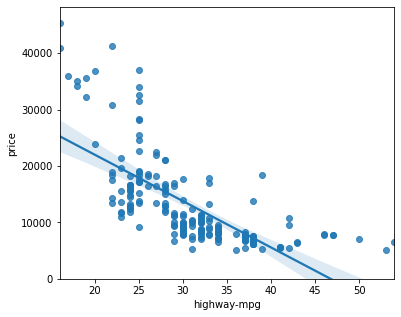

In [ ]:
#1: importar o seabor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

width = 6
height = 5
plt.figure(figsize=(width, height))

#2: use a função regplot() 
#x = variável preditora
#y = alvo
# data: dados do parâmetro 

sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)


Podemos ver neste gráfico que o preço está negativamente correlacionado com a variável 'highway-mpg', uma vez que a inclinação da regressão é negativa.<br/>
Uma coisa a ter em mente ao examinar um gráfico de regressão é prestar atenção em como os pontos de dados estão espalhados ao redor da linha de 
regressão. Isso lhe dará uma boa indicação da variação dos dados e se um modelo linear seria o melhor ajuste ou não. Se os dados estiverem muito
distantes da linha, este modelo linear pode não ser o melhor modelo para esses dados.


 Vamos comparar este gráfico com o gráfico de regressão de "peak-rpm".

(0.0, 47414.1)

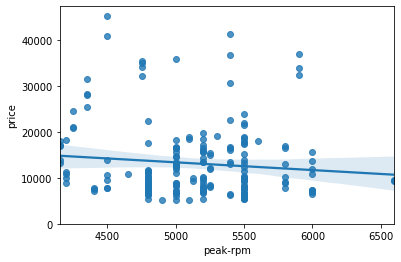

In [ ]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)


Comparando o gráfico de regressão de "peak-rpm" e "highway-mpg'", vemos que os pontos de "highway-mpg'" estão muito mais próximos da linha 
gerada  e na diminuição média. Os pontos para "peak-rpm" estão mais espalhados ao redor da linha prevista e é muito mais difícil determinar 
se os pontos  estão diminuindo ou aumentando à medida que a "peak-rpm'" aumenta.

Analisemos a correlação entre essas duas variáveis e o preço para melhores conclusões.

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000



A variável ,"highway-mpg" tem uma correlação mais forte com o preço, é aproximadamente (-0.704692)  comparado a "peak-rpm" que é aproximadamente 
(-0.101616). Ambas tem tem uma correlação negativa, ou seja, seu impacto seria na diminuição do preço do carro. 

**Gráfico Residual - Residual Plot**

Uma boa maneira de visualizar a variação dos dados é usar um gráfico residual.

O que é um resíduo ?<br>
É diferença entre o valor observado (y) e o valor previsto (Yhat). Quando olhamos para um gráfico de regressão,  o residual é a distância do ponto de dados à linha de regressão ajustada.

Então, o que é um gráfico residual ?<br>
Um gráfico residual é um gráfico que mostra os resíduos no eixo y vertical e a variável independente no eixo x horizontal.<br>
Em que prestamos atenção quando olhamos para um gráfico residual?<br>
Nós olhamos para a propagação dos resíduos:
- Se os pontos em um gráfico residual forem espalhados aleatoriamente em torno do eixo x, o modelo linear é apropriado para os dados. 
- Resíduos distribuídos aleatoriamente significam que a variância é constante e, portanto, o modelo linear é um bom ajuste para esses dados.




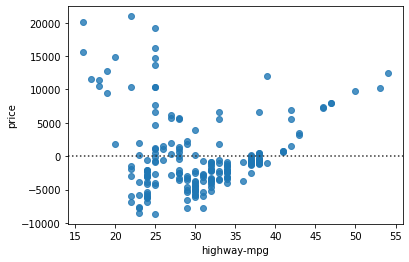

In [ ]:
#utilizamos novamente a biblioteca seaborn
import seaborn as sns

#usamos a função residplot()
#O primeiro parâmetro é uma série de variável dependente ou recurso.
#O segundo parâmetro é uma série de variável dependente ou destino.

sns.residplot(df['highway-mpg'], df['price'])



Podemos ver neste gráfico que os resíduos não estão espalhados aleatoriamente em torno do eixo x, o que nos leva a acreditar que 
talvez um modelo não linear seja mais adequado para esses dados.
Vemos neste caso que os residuos têm uma curvatura.



**Gráfico de distribuição - Distribution Plots**


Como podemos visualizar um modelo de **regressão linear múltipla**? 
Isso fica um pouco mais complicado porque você não pode visualizá-lo com 
gráfico regressão ou  residual.<br>
Uma maneira de ver o ajuste do modelo é olhando o gráfico de distribuição : podemos olhar para a distribuição dos valores ajustados que 
resultam do modelo e compará-la com a distribuição dos valores reais.

Primeiro vamos fazer uma previsão

In [ ]:
Yhat = lm.predict(z)

Depois usamos esses dados previstos para comparar aos reais.

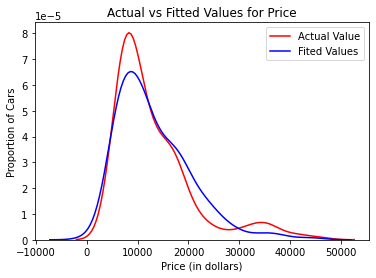

In [ ]:
#usamos novamente a biblioteca seaborn
import seaborn as sns

#Valores reais são usados como parâmetro - plt valores reais
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')

#plota os valores previstos calculados no regressão linear simples acima
sns.distplot(Yhat, hist=False, color='b', label='Fited Values', ax= ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()



Podemos ver que os valores ajustados estão razoavelmente próximos dos valores reais, uma vez que as duas distribuições se sobrepõem um pouco. 
No entanto, há definitivamente espaço para melhorias.


###Regressão Polinômial e pipelines

**Regressão Polinômial**

A regressão polinomial é um caso especial da regressão linear. Este método é benéfico para descrever relações curvilíneas. É usada quando o modelo linear não é a melhor opção de ajuste para os dados.

O que é uma relação curvilínea?<br>
É o que você obtém ao elevar ao quadrado ou definir termos de ordem superior das variáveis ​​preditoras no modelo, transformando os dados.

- O modelo pode ser quadrático, o que significa que a variável preditora no modelo é ao quadrado. É uma regressão polinomial de segunda ordem.

              Quadrático - 2ª ordem
              yhat = a + b1X² + b2X²

-  cúbico, o que significa que a variável preditora é cúbica. É uma regressão polinomial de terceira ordem.

             Cúbico - 3ª ordem
             yhat= a + b1X² + b2X² + b3X³

- Também existem regressões polinomiais de ordem superior, quando um bom ajuste não foi alcançados por segunda ou terceira ordem.

            Ordem superior
            E = a + b1X² + b2X² + b3X³....

O grau da regressão faz uma grande diferença e pode resultar em um melhor ajuste se você escolher o valor certo.

**Modelo 1**

Veremos um exemplo de aplicação de uma função polinômial de 3ª ordem em python, para isso usamos a biblioteca `numpy` e a função `polyfit`



In [ ]:
#importando a biblioteca numpy
import numpy as np


Vamos usar a seguinte função:

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Selecionamos as variáveis preditora e alvo.

In [ ]:
x = df['highway-mpg']
y = df['price']

Vamos ajustar o polinômio usando a função `polyfit` e  em seguida, usar a função `poly1d` para exibir a função polinomial.

In [ ]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Agora representaremos graficamente a função

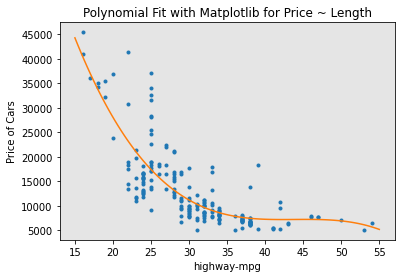

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

Podemos ver na plotagem que este modelo polinômial tem um desempenho melhor do que o modelo linear. Isso ocorre porque a função polinomial  gerada "atinge" mais os pontos de dados.

**Modelo 2**

Agora criaremos um modelo polinômial de ordem 11.

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


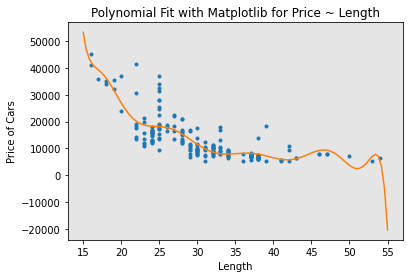

In [ ]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)

PlotPolly(p1,x,y, 'Length')

**Regressão plinômial com mais de uma dimensão**

A expressão analítica para função polinomial multivariada é complicada. Utilizamos a biblioteca `sckit-learn` para isso.




Importamos o método de preprocessamento da scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Criamos um objeto com o construtor e este recebe  grau do polinômio

In [ ]:
pr = PolynomialFeatures(degree=2, include_bias=False)

Em seguida, transformamos os recursos em um recurso polinomial com o método `fit_transform`.

In [ ]:
Z_pr = pr.fit_transform(z)

Dimensões das variáveis após a tranformação.

In [ ]:
z.shape

(201, 4)

In [ ]:
Z_pr.shape

(201, 14)

Conforme a dimensão dos dados fica maior, podemos normalizar vários recursos em scikit-learn,em vez disso, podemos usar o módulo preprocessing para simplificar muitas tarefas. Por exemplo, podemos padronizar cada recurso simultaneamente. 

Importamos o método e criamos seu objeto.

In [ ]:
from sklearn.preprocessing import StandardScaler

SCALE = StandardScaler()

Treinamos nosso modelo usando o objeto criado.

In [ ]:
SCALE.fit(df[['horsepower', 'highway-mpg']])

StandardScaler(copy=True, with_mean=True, with_std=True)

Transformamos os dados em um novo dataframe  em ` x_scale`.

In [ ]:
x_scale = SCALE.transform(df[['horsepower', 'highway-mpg']])

**Pipelines**

Pipelines são uma maneira de simplificar seu código. 
Existem muitas etapas para obter uma previsão, por exemplo, normalização, transformação polinomial, e regressão linear.
```
normalização ----> transformação polinomial -----> regressão linear.
```

Podemos simplificar o processo usando um pipeline.
Os pipelines executam sequencialmente uma série de transformações. A última etapa realiza uma previsão.


Importamos todos os módulos de que precisamos e a biblioteca Pipeline.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

Criamos uma lista de tuplas, o primeiro elemento na tupla contém o nome do estimador do modelo.

In [ ]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)),("model", LinearRegression())]

O segundo elemento contém o construtor do modelo. Inserimos a lista no construtor do pipeline.

In [ ]:
pipe = Pipeline(Input)

Podemos treinar o pipeline aplicando o método `fit` ao objeto Pipeline.

In [ ]:
pipe.fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Também podemos produzir uma previsão.

In [ ]:
ypipe = pipe.predict(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

O método normaliza os dados, realiza uma transformação polinomial e, em seguida, gera uma previsão.

### Avaliação na Amostra (R-quadrado e MSE)


Essas medidas são uma forma de determinar numericamente o quão bem o modelo se ajusta aos nossos dados. são duas medidas importantes que costumamos 
usar para determinar o ajuste de um modelo são: 

- Erro Quadrado médio (MSE) 
- R-quadrado.

**MSE - Erro quadrático médio**

O erro quadrático médio calcula a média dos erros quadrados , ou seja, a diferença entre o valor real (y) e o valor estimado (yhat). À medida que o erro quadrático aumenta, os alvos se distanciam dos pontos previstos.

Para medir o MSE, fazemos o somatório da diferença entre o valor real (y) e o valor estimado (yhat) elevado ao quadrado (de cada uma das amostras) e dividimos pelo número de amostras.

                    somatorio(y - yhat)² / nº de amostras

Para encontrar o MSE em Python, podemos importar o `mean_Squared_error ()` de `scikit-learn.metrics`. A função `mean_Squared_error ()` obtém 
duas entradas: 
- o valor real da variável alvo.
- o valor estimado da variável alvo.



Importamos a função `mean_squared_error`

In [ ]:
from sklearn.metrics import mean_squared_error

***Vamos calcular o MSE para as regressões linear, múltipla e polinomial***

**Regressão linear simples**

Vamos treinar nosso modelo e fazer a previsão para calcularmos o MSE.

In [ ]:
#importanto a função LinearRegression e criando um objeto
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#extraindo as variáveis preditora e alvo que serão utilizadas no modelo
X = df[['highway-mpg']]
y = df['price']

#Treinando nosso modelo
lm.fit(X, y)

# E por fim fazemos a previsão
Yhat=lm.predict(X)
print('A saída dos quatro primeiros valores previstos é: ', Yhat[0:4])

A saída dos quatro primeiros valores previstos é:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


E utilizamos os dados estimados `Yhat`, para calcular o MSE. Calculamos a média entre os valores reais `df['price']` e os dados estimados `Yhat` utilizando a função `mean_squared_error()`. Obtendo assim o valor do erro quadrático médio (MSE).

In [ ]:
mse = mean_squared_error(df['price'], Yhat)

print(' O erro quadratico médio entre o preço e os valores estimados é: ', mse)

 O erro quadratico médio entre o preço e os valores estimados é:  31635042.944639888


**Regressão linear múltipla**

Vamos treinar nosso modelo e fazer a previsão usando dos dados do treinamento

In [ ]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(z, df['price'])

Y_predict_multifit = lm.predict(z)

Usando os dados estimados `Y_predict_multifit` calculamos o MSE.

In [ ]:
mse_mlr = mean_squared_error(df['price'], Y_predict_multifit)

print('O erro quadratico médio do preço e valores estimados usando resgressão múltipla é: ', mse_mlr)

O erro quadratico médio do preço e valores estimados usando resgressão múltipla é:  11979300.34981888


***Regressão polinomial***

Aqui calculamos o MSE da regressão polinomial desenvolvida na sessão anterior.

In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

**R-QUADRADO (R²)**

R-quadrado também é chamado de coeficiente de determinação. É uma medida para determinar quão próximos os dados estão da linha de regressão 
ajustada. <br>
R² = (1- (MSE da regressão da linha / MSE da média dos pontos de dados)).
Encontramos o valor R-quadrado em Python usando o método `.score()`, da função `LinearRegression()`




**Vamos calcular o R²  para as regressões linear, múltipla e polinomial**

**Regressão linear simples**

Após o treinamento do modelo já podemos calcular o R-quadrado, usamos o objeto de regressão linear para isso `lm.score()` passando como parâmetros as variáveis preditora e alvo respectivamente.

In [ ]:
#Treinamento do modelo 
lm.fit(X, y)

#Calculo do R²
lm.score(X,y)

0.4965911884339176


Do valor que obtemos com este exemplo, podemos dizer que aproximadamente 49,695% do a variação de preço é explicada por este modelo linear 
simples.

O valor de R² é geralmente entre 0 e 1, se seu R² for negativo pode ser devido a sobreajuste(overfitting)

**Regressão linear múltipla**

Treinamos o modelo e depois encontramos o R²

In [ ]:
# treinamento do modelo
lm.fit(z, df['price'])

# Encontrando o  R^2
rq_mlr = lm.score(z, df['price'])
print('O  R-quadrado é: ',rq_mlr )

O  R-quadrado é:  0.8093732522175299


**Regressão polinomial**

Na regressão polinomial usamos um método do `sklearn.metrics` o `r2_score` para calcular o R-quadrado.

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))

print('O R-quadrado é: ', r_squared)

O R-quadrado é:  0.674194666390652


###Previsão e tomada de decisão


**Como podemos determinar se nosso modelo está correto?**

- A primeira coisa que você deve fazer é garantir que os resultados do modelo façam sentido.
- Você deve sempre usar visualização, medidas numéricas para avaliação e comparação entre modelos diferentes.
  - Usar um gráfico de regressão para visualizar seus dados é o primeiro método que você deve tentar.
  - Examinar o gráfico de resíduos
  - Um gráfico de distribuição é um bom método para Regressão Linear Múltipla.
  - O erro quadrático médio é talvez a medida numérica mais intuitiva para determinar se um modelo é bom ou não; À medida que o erro quadrático aumenta, os alvos se distanciam dos pontos previstos.
  - R² (R-quadrado) é outro método popular para avaliar seu modelo. Um valor aceitável para R² depende de qual campo você está estudando.


Exemplo 1

Aqui treinamos um modelo de regressão linear simples usando 'highway-mpg' como variável preditora e 'price' como variável alvo. E depois analisamos uma previsão com valor de 'highway-mpg' igual a 30.

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#treinando o modelo
lm.fit(df[['highway-mpg']], df['price'])

#Agora queremos descobrir qual seria o preço de um carro que tem um mpg rodovia de 30.
lm.predict([[30]])

array([13771.3045085])


Colocar esse valor no método predict () nos dá um preço resultante de $ 13.771,30. Isso parece fazer sentido, por exemplo, o valor não é 
negativo, extremamente alto ou extremamente baixo.

Podemos ver os coeficientes.

In [ ]:
#inclinação
lm.coef_

array([-821.73337832])

In [ ]:
#interceptação
lm.intercept_

38423.3058581574


`Price = 38423.30 - 821.73 * 'highway-mpg'`

Como tal, um aumento de uma unidade na highway-mpg, o valor do carro diminui aproximadamente 821 dólares; este valor também parece razoável.

Exemplo 2<br>
Geramos uma sequência de valores para fazer uma previsão, e visualizamos essa previsão graficamente.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [ ]:
#Para gerar uma sequência de valores em um intervalo especificado, importe numpy e, em seguida, use numpy "arange"
# função para gerar a sequência.
import numpy as np

#Crie uma nova entrada
new_input = np.arange(1,101,1).reshape(-1,1)

#Ajuste o modelo
lm.fit(X, y)

#Produza uma previsão
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

nós podemos plotar os dados

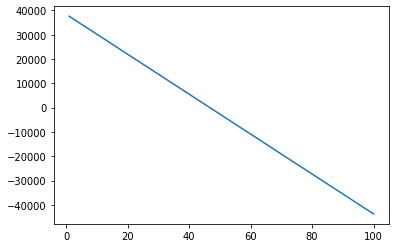

In [ ]:
plt.plot(new_input, yhat)
plt.show()

Às vezes, seu modelo produzirá valores que não fazem sentido, por exemplo, se traçarmos o modelo para highway-mpg, nos intervalos de 0 a 100, 
obtemos valores negativos para o preço. 
Isso pode ser porque os valores nesse intervalo não são realistas, a suposição linear é incorreto, ou 
não temos dados para carros nessa faixa. Neste caso, é improvável que um carro tenha uma milhagem de combustível nessa faixa, então nosso modelo
parece válido.

**TOMADA DE DECISÃO: DETERMINANDO UM BOM AJUSTE DO MODELO**

Agora que visualizamos os diferentes modelos e geramos os valores R-quadrado e MSE para os ajustes, como determinamos um bom ajuste do modelo?

**O que é um bom valor de R-quadrado?**
- Ao comparar modelos, o modelo com o valor de R-quadrado mais alto se ajusta melhor aos dados.

**O que é um bom MSE?**
- Ao comparar modelos, o modelo com o menor valor de MSE é um melhor ajuste para os dados.


A
Vamos dar uma olhada nos valores dos diferentes modelos.
- Regressão linear simples: usando Highway-mpg como variável preditora de preço.
  - R-quadrado: 0,49659118843391759
  - MSE: 3,16 x 10^7

- Regressão linear múltipla: usando horserpower, curb-weight, engine-size e highway-mpg como variáveis ​​de previsão de preço.
  - R ao quadrado: 0,80896354913783497
  - MSE: 1,2 x10^7

- Ajuste polinomial: usando Highway-mpg como uma variável preditora de preço.
  - R ao quadrado: 0,6741946663906514
  - MSE: 2,05 x 10^7

**Modelo de regressão linear simples (SLR) vs modelo de regressão linear múltipla (MLR)**


Geralmente, quanto mais variáveis ​​você tiver, melhor será a previsão do seu modelo, mas isso nem sempre é verdade. Às vezes, você pode ter 
dados suficientes,mas pode ter problemas numéricos ou muitas das variáveis ​​podem não ser úteis e ou mesmo atuar como ruído. Como resultado, você 
deve sempre verificar o MSE e R².

Portanto, para poder comparar os resultados dos modelos MLR vs SLR, observamos uma combinação de R-quadrado e MSE para tirar a melhor conclusão 
sobre o ajuste do modelo.
- MSE
  - SLR =  3,16 x 10^7
  - MLR =  1,2 x 10^7. 

O MSE do MLR é muito menor.

- R-quadrado :
  - SLR =  (~ 0,497) 
  - MLR =  (~ 0,809)

Neste caso, também podemos ver que há uma grande diferença entre o R-quadrado do SLR e o R-quadrado do MLR. O R-quadrado para o SLR é muito pequeno em comparação com o R-quadrado do MLR. 

O R-quadrado em combinação com o MSE mostra que o MLR parece ser o modelo de melhor ajuste neste caso, em comparação com o SLR.




**Modelo Linear Simples (SLR) vs Ajuste Polinomial**

MSE: 
  - AP = 2,05 x 10^7
  - SLR = 3,16 x 10^7

Podemos ver que o ajuste polinomial possui MSE menor que o do SLR.

R-quadrado: 
  - AP = (~ 0,674)
  - SLR = (~ 0,497)

O R-quadrado para o Polyfit é maior do que o R-quadrado para o SLR, então o ajuste polinômial também aumentou um pouco o R-quadrado.

Uma vez que o ajuste polinomial resultou em um MSE menor e um R-quadrado maior, podemos concluir que este foi um modelo de ajuste melhor do que 
a regressão linear simples para prever preço com highway-mpg como variável preditora.

**Regressão Linear Múltipla (MLR) vs Ajuste Polinomial**

MSE : 
   - AP = 2,05 x 10^7
   - MLR = 1,2 x 10^7

O MSE para o MLR é menor do que o MSE para o ajuste polinomial.

R-quadrado : 
  - AP = (~ 0,674)
  - MLR = (~ 0,809)
  
O R-quadrado para o MLR também é muito maior do que para o ajuste polinomial.




**Conclusão**

Comparando esses três modelos, concluímos que o modelo MLR é o melhor modelo para ser capaz de prever o preço de nosso conjunto de dados. 
Esse resultado faz sentido, uma vez que temos 27 variáveis ​​no total e sabemos que mais de uma dessas variáveis ​​são preditores potenciais do 
preço final do carro.


##MÓDULO 5 - AVALIAÇÃO DO MODELO


Como você pode ter certeza de que seu modelo funciona no mundo real e tem um desempenho ideal?



V amos usar apenas dados numéricos para os exemplos e aplicações.

`_get_numeric_data()` :  seleciona somente as colunas numéricas de um dataframe


In [ ]:
#gerando um dataframe somente com as variáveis numéricas
df1= df._get_numeric_data()
df1.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,0,1,1,0



Bibliotecas para plotagens


In [ ]:
%%capture
! pip install ipywidgets

In [ ]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


**Funções para plotagem**

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

###Avaliação do modelo


A **avaliação de modelo** nos diz como nosso modelo performa no mundo real. 

A avaliação da amostra nos diz quão bem nosso modelo se ajusta aos dados de treinamento.<br> 
**Problema**: a avaliação da amostra não nos dá uma estimativa de quão  bem o modelo treinado pode prever novos dados.<br>
**Solução**: dividir nossos dados, usar uma parte dos dados para o treinamento do modelo e o restante dos dados, para testar o modelo.


**Conjuntos de Treinamento e Teste (Training/ Testing  Sets)**

Separar dados em conjuntos de treinamento e teste é uma parte importante da avaliação do modelo. Usamos os dados de teste para ter uma ideia de 
como nosso modelo funcionará no mundo real.

Quando dividimos um conjunto de dados, geralmente a maior parte dos dados é usada para treinamento e uma parte menor é usada para teste.
Por exemplo, podemos usar 70% dos dados para treinamento; então usamos 30% para teste.
- conjunto de treinamento: usado para construir um modelo e descobrir relacionamentos preditivos.
- conjunto de teste: usado para avaliar o desempenho do modelo.

Essa divisão pode ser feita de forma bem simples na linguagem python usando a função `train_test_split()`.


**train_test_split()**

É uma função popular no pacote scikit-learn para dividir conjuntos de dados. Esta função divide aleatoriamente um  conjunto de dados em subconjuntos de treinamento e teste.  Ela retorna os subconjuntos de treino e teste tanto das váriaveis preditoras quando do alvo.

PARÂMETROS
- `x_data` : lista de variáveis preditoras
- `y_data`: varável alvo (price)
- `test_size`:  tamanho do conjunto de teste
- `randon_state`: dados gerados de forma aleatória (1) caso contrario (0)

SAÍDA 
- `x_train, y_train` : subconjuntos de treino
- `x_test, y_test` : subconjuntos de teste


**Divisão dos dados em conjuntos de treinamento e teste**

Extraimos as variáveis preditoras e alvos

In [ ]:
#variável alvo
y_data = df1['price'] 

#variáveis preditoras: todas as numéricas menos a variável preço (price)
x_data=df1.drop('price',axis=1)


Importamanos a função  `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

E fazemos a divisão, neste caso serão: 85% dos dados para treinamento e os 15% restantes para teste, escolhidos de forma aleatória.

In [ ]:
# Dividimos aleatoriamente nossos dados em dados de treinamento e teste usando a função train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print('Número de amostras de teste: ', x_test.shape[0])
print('Número de amostras de treinamento: ', x_train.shape[0])

Número de amostras de teste:  31
Número de amostras de treinamento:  170


Aqui temos uma nova divisão, na qual, 60% dos dados são para treinamento e  40%  para teste, dados escolhidos de forma não aleatória.


In [ ]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print('Número de amostras de teste: ', x_test_1.shape[0])
print('Número de amostras de treinamento: ', x_train_1.shape[0])

Número de amostras de teste:  81
Número de amostras de treinamento:  120


Vamos desenvolver um modelo de regressão linear para visualizar melhor essa divisão de treinamento e teste.

*Criar um modelo de regressão linear*



In [ ]:
#Vamos importar LinearRegression do módulo linear_model .

from sklearn.linear_model import LinearRegression

In [ ]:
#Criamos um objeto de regressão linear:
lre = LinearRegression()

In [ ]:
#ajustamos o modelo usando o horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Vamos calcular o R² nos dados de teste:
lre.score(x_test[['horsepower']], y_test)

0.7076967079117262

In [ ]:
#podemos ver que R² é muito menor usando os dados de treino.
lre.score(x_train[['horsepower']], y_train)

0.6450110239384647

**Erro de Generalização**

O erro de generalização é uma medida de quão bem nossos dados se saem ao prever dados não vistos/desconhecidos. Obtemos o erro usando nossos dados de teste.

Graficos de distribuição `sns.displot()`  são uma boa forma de visualizar essa diferença entre os dados reais e os previstos pela regressão. 
Podemos gerar tanto para o conjunto de treino quanto para teste.




**Cross Validation**


É uma das *métricas de avaliação fora da amostra* mais comuns. Neste método, o conjunto de dados é dividido em grupos k-iguais; cada grupo é referido como uma dobra.

Algumas das dobras podem ser usadas como um conjunto de treinamento, e as partes restantes são usadas como um  conjunto de teste.

Por exemplo se tivermos 4 dobras, podemos usar:
- três dobras para treinamento;
- uma dobra para teste.

Isso é repetido até que cada partição seja usada para treinamento e teste.

No final, usamos os resultados médios como a estimativa do erro fora da amostra.
A métrica de avaliação depende do modelo.Por exemplo R².


***cross_val_score ()***

É a maneira mais simples de aplicar validação cruzada, que realiza várias avaliações 'fora da amostra'. Este método é importado do pacote de 
`model_selection` do `sklearn`.

*Parâmetros*
- `lr` : tipo de modelo - no caso, linear regression
- `x_data` : dados das variáveis preditoras
- `y_data` : dados da(s) variável(is) de destino
- `cv` : especifica a quantidade de partições
- `retorno`: a função retorna uma matriz de pontuações, uma para cada partição que foi escolhida como o conjunto de teste. 


Importamos o método 

In [ ]:
#Vamos importar model_selection do módulo cross_val_score .
from sklearn.model_selection import cross_val_score

Calculamos a validação cruzada usando a variável 'horsepower' como preditora e y_data como alvo, e com 4 partições.

In [ ]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

Aqui podemos ver os resultados do cálculo acima, ou seja, os valores de R² para cada uma das partições.

In [ ]:
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

Podemos calcular a média e o desvio padrão de nossa estimativa:

In [ ]:
print("A média das dobras são:", Rcross.mean(), "e o desvio padrão é: " , Rcross.std())

A média das dobras são: 0.5220592359225414 e o desvio padrão é:  0.29130480666118436


Podemos usar o erro quadrático negativo como pontuação definindo o parâmetro 'pontuação' métrica como 'neg_mean_squared_error'.
A função `cross_val_score ()` retorna um valor de pontuação para nos dizer o resultado validação cruzada.

In [ ]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

***cross_val_predict ()*** 

E se quisermos um pouco mais de informação: e se quisermos saber os valores reais previstos fornecidos pelo nosso modelo antes dos valores de R-quadrado serem calculados?

Para fazer isso, usamos a função `cross_val_predict ()`. 

Os parâmetros de entrada são exatamente os mesmos da função cross_val_score (), **mas a saída é uma previsão**. 
Essas previsões são armazenadas em uma matriz.





Importamos o método e adicionamos os paraêmtros necessários, mas a saída será uma previsão.

In [ ]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

###Overfitting, Underfitting e modelo de seleção


Acontece que os dados de teste, às vezes chamados de dados fora da amostra, são uma medida muito melhor de quão bem o seu modelo funciona 
no mundo real. Uma razão para isso é o sobreajuste; vamos examinar alguns exemplos. Acontece que essas diferenças são mais aparentes na 
Regressão Linear Múltipla e na Regressão Polinomial, portanto, exploraremos o overfitting nesse contexto.


*Underfitting*


O modelo é muito simples para ajustar os dados, por exemplo, se os dados formam uma curva, usar um modelo linear não seria uma boa opção de ajuste.

*Overfitting*

Isso é chamado de sobreajuste, onde o modelo é muito flexível e se adapta ao ruído em vez do que a função. Se ajusta demasiado aos dados.

Podemos calcular diferentes valores de R ao quadrado da seguinte forma:


Vamos criar objetos de regressão linear múltipla e treinar o modelo usando 'horsepower' , 'curb-weight' , 'engine-size' e 
'highway-mpg' como recursos.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predição usando dados de treinamento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.25153792, 11236.70125955,  6436.82274615, 21891.09897761,
       16669.10119352])

In [ ]:
#Predição usando dados de teste:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.48964574,  5914.6130239 , 11243.35261505,  6661.95904136,
       15555.94734434])

Vamos realizar algumas avaliações de modelo usando nossos dados de treinamento e teste separadamente. Primeiro importamos a biblioteca seaborn e matplotlibb para plotagem.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Vamos examinar a distribuição dos valores previstos dos dados de treinamento.

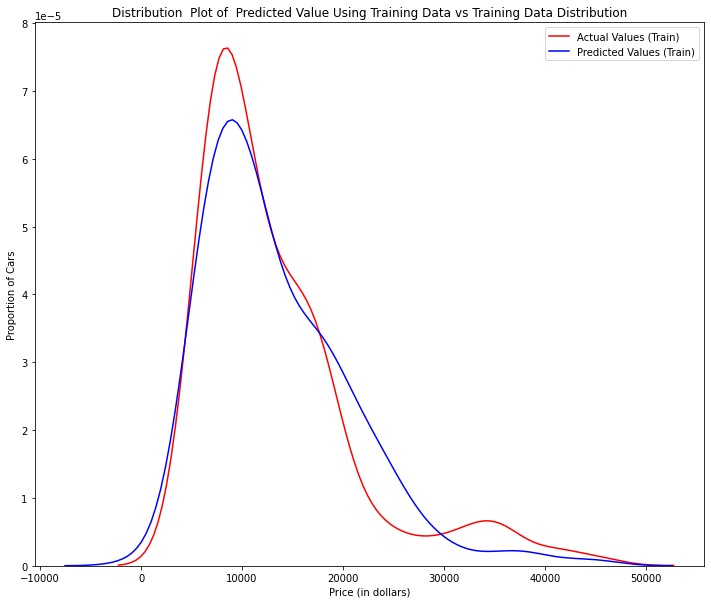

In [ ]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)



```
Figura 1: Gráfico de valores previstos usando os dados de treinamento em comparação com os dados de treinamento.
```



Até agora, o modelo parece estar indo bem no aprendizado do conjunto de dados de treinamento. Mas o que acontece quando o modelo encontra novos dados do conjunto de dados de teste? Quando o modelo gera novos valores a partir dos dados de teste, vemos que a distribuição dos valores previstos é muito diferente dos valores reais de destino.

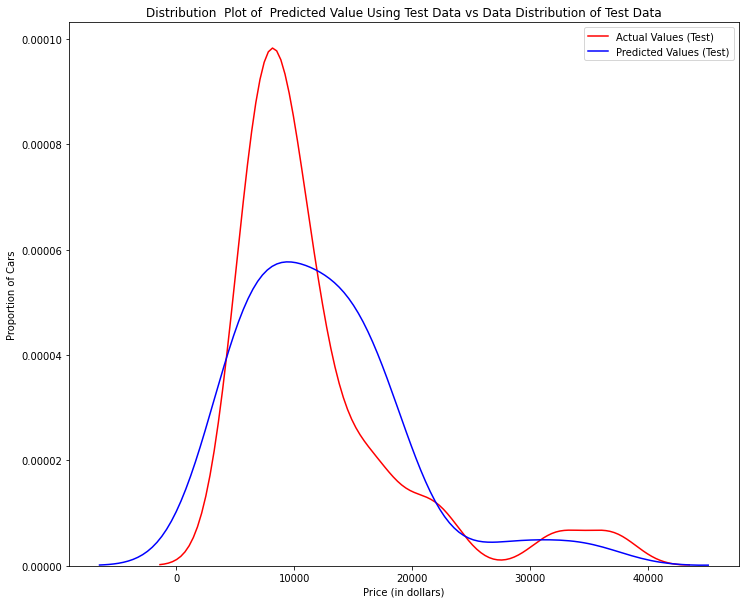

In [ ]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)



```
Figura 2: Gráfico do valor previsto usando os dados do teste em comparação com os dados do teste.
```



Comparando a Figura 1 e a Figura 2; é evidente que a distribuição dos dados de teste na Figura 1 é muito melhor no ajuste dos dados. Esta diferença na Figura 2 é aparente onde os intervalos vão de 5.000 a 15.000. É aqui que a forma de distribuição é excepcionalmente diferente. Vamos ver se a regressão polinomial também exibe uma queda na precisão da previsão ao analisar o conjunto de dados de teste.

**Overfitting**

O overfitting (sobreajuste) ocorre quando o modelo se ajusta ao ruído, não ao processo subjacente. Portanto, ao testar seu modelo usando o conjunto de testes, seu modelo não tem um desempenho tão bom quanto o ruído de modelagem, não o processo subjacente que gerou o relacionamento. Vamos criar um modelo polinomial de grau 5.

Vamos usar 55% dos dados para treinamento e o restante para teste :

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Realizaremos uma transformação polinomial de grau 5 no recurso 'horsepower'. 

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

agora vamos criar um modelo de regressão linear `poly` e treiná-lo.

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos ver a saída de nosso modelo usando o método "predict", em seguida, atribuir os valores a "yhat".

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.58219945,  7306.70943225, 12213.70783901, 18895.03307984,
       19996.8349332 ])

Vamos pegar os primeiros cinco valores previstos e compará-los com os alvos reais.

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.58219945  7306.70943225 12213.70783901 18895.03307984]
True values: [ 6295. 10698. 13860. 13499.]


Usaremos a função "PollyPlot" que definimos no início para exibir os dados de treinamento, dados de teste e a função prevista.

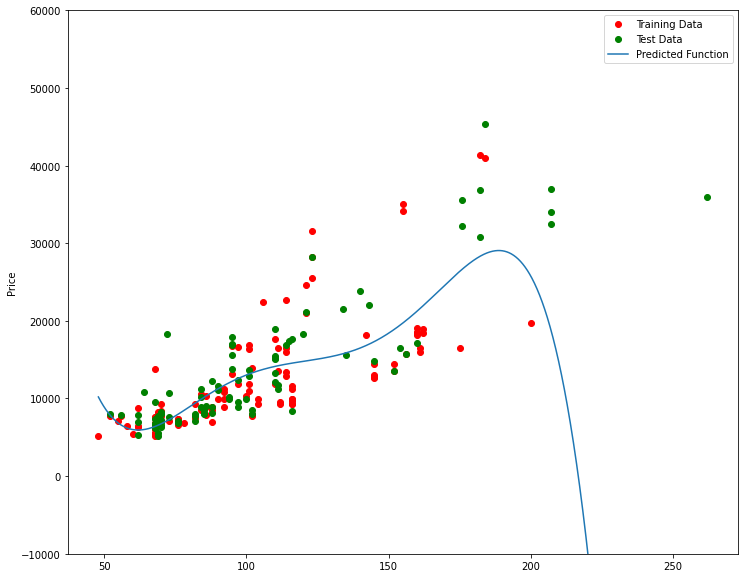

In [ ]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)



```
Figura 4. Um modelo de regressão polinomial, os pontos vermelhos representam os dados de treinamento, os pontos verdes representam os dados de 
teste e a linha azul representa a previsão do modelo.
```



Vemos que a função estimada parece rastrear os dados, mas em torno de 200 cavalos de potência, a função começa a divergir dos pontos de dados.

R² dos dados de treinamento

In [ ]:
poly.score(x_train_pr, y_train)

0.5568527853920224

R² dos dados de teste

In [ ]:
poly.score(x_test_pr, y_test)

-29.815556299616325

Vemos que o R² para os dados de treinamento é 0,5567, enquanto o R² nos dados de teste foi -29,87. Quanto menor o R², pior o modelo, um R² negativo é um sinal de sobreajuste(overfitting).

Vamos ver como o R² muda nos dados de teste para polinômios de ordem diferente e plotar os resultados:

Text(3, 0.75, 'Maximum R^2 ')

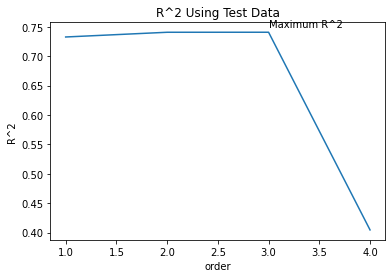

In [ ]:
#criamos uma lista vazia
Rsqu_test = []

#criamos uma lista contendo as diferentes odens polinômiais
order = [1,2,3,4]

#Em seguida iteramos pela lista usando loop
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Vemos que R² aumenta gradualmente até que um polinômio de ordem três seja usado. Em seguida, o R² diminui drasticamente em quatro.

A seguinte função será usada na próxima seção; por favor execute a célula.

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

A interface a seguir permite que você experimente diferentes ordens polinomiais e diferentes quantidades de dados.

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

###Rigde Regression


A rigde regression evita o overfitting. A regressão Ridge controla a magnitude desses coeficientes polinomiais introduzindo o parâmetro alpha.

**Alpha** é um parâmetro que selecionamos antes de ajustar ou treinar o modelo. Os valores de alfa podem variar( 0, 0.001, 0.01, 1, 10). Conforme o alfa aumenta, os parâmetros ficam menores. Isso é mais evidente para os recursos polinomiais de ordem superior, mas o alfa deve ser 
selecionado com cuidado.  Se alfa também é grande, os coeficientes se aproximarão de zero e não se ajustarão aos dados.
-  alfa = zero, o sobreajuste(overfitting) é evidente.
-  alfa = 0,001, o sobreajuste(overfitting) começa a diminuir. 
-  alfa = 0,01, a função estimada rastreia a função real. 
-  alfa = 1, vemos os primeiros sinais de ajuste insuficiente (Underfitting). A função estimada não tem flexibilidade suficiente.
- alfa = 10, vemos extremo ajuste insuficiente (Underfitting); ele nem mesmo rastreia os dois pontos.

Para selecionar alfa, podemos usar validação cruzada.



Vamos realizar uma transformação polinomial de grau dois em nossos dados.

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Vamos importar Ridge dos modelos lineares do módulo .

In [ ]:
from sklearn.linear_model import Ridge

Vamos criar um objeto de regressão Ridge, definindo o parâmetro de regularização para 0,1

In [ ]:
RigdeModel = Ridge(alpha=0.1)

Como a regressão regular, você pode ajustar o modelo usando o método fit .

In [ ]:
RigdeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Da mesma forma, você pode obter uma previsão:

In [ ]:
yhat = RigdeModel.predict(x_test_pr)

Vamos comparar as cinco primeiras amostras previstas com nosso conjunto de teste

In [ ]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6569.10080596  9595.9695303  20834.19869602 19347.43557722]
test set : [ 6295. 10698. 13860. 13499.]


Selecionamos o valor de Alfa que minimiza o erro de teste, por exemplo, podemos usar um loop for.

In [ ]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

Podemos traçar o valor de R² para diferentes Alfas.

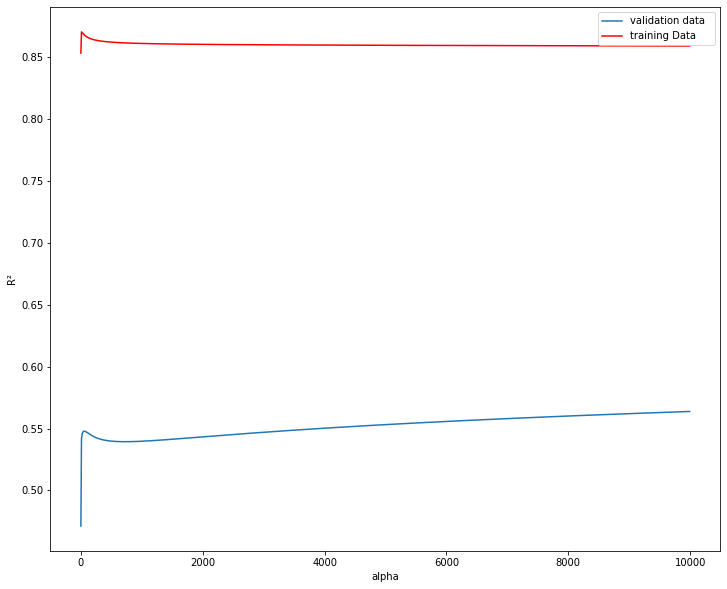

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.legend()

Figura 6: A linha azul representa o R² dos dados de teste e a linha vermelha representa o R² dos dados de treinamento. O eixo x representa os diferentes valores de Alfa


A linha vermelha na figura 6 representa o R² dos dados de teste, conforme Alpha aumenta, o R² diminui; portanto, à medida que o Alfa aumenta, o modelo tem pior desempenho nos dados de teste. A linha azul representa o R² nos dados de validação, à medida que o valor para Alfa aumenta, o R² diminui.


**Para determinar o parâmetro alfa** usamos alguns dados para treinamento. Usamos um segundo conjunto chamado dados de validação; isso é 
semelhante aos dados de teste, mas é usado para selecionar parâmetros como alfa. 

Começamos com um pequeno valor de alfa
- treinamos o modelo, 
- fazemos uma previsão usando os dados de validação, 
- calculamos o R-quadrado e armazenamos os valores. 

Repetimos o processo para um valor maior de alfa. 
- Treinamos o modelo novamente 
- fazemos uma previsão usando os dados de  validação, 
- calculamos o R-quadrado e armazenamos os valores.

Repetimos o processo para um valor alfa diferente, 
- treinando o modelo e fazendo uma previsão.

Selecionamos o valor de alfa que maximiza o R-quadrado. 

Podemos usar outros métricas para selecionar o valor de alfa, como erro quadrático médio.



###Pesquisa de Grade (grid search)


A pesquisa em grade nos permite examinar vários parâmetros livres com poucas linhas de código. Parâmetros como o termo alfa discutido antes que  não fazem parte da adaptação ou processo de treinamento.

Esses valores são chamados de hiperparâmetros.

O Scikit-learn tem um meio de iterar automaticamente esses hiperparâmetros usando validação cruzada. Este método é denominado `grid search`.


**grid search**

A pesquisa em grade 
- pega o modelo ou objetos que você gostaria de treinar e diferentes valores de os hiperparâmetros. 
- calcula o erro quadrático médio ou R-quadrado para vários valores de hiperparâmetros, permitindo que você  escolha os melhores valores.

Para selecionar o hiperparâmetro, dividimos nosso conjunto de dados em três partes:
- conjunto de treinamento
- conjunto de validação 
- conjunto  de teste

Treinamos o modelo para diferentes hiperparâmetros. Usamos o R-quadrado ou erro quadrático médio para cada modelo.
Selecionamos o hiperparâmetro que minimiza o erro quadrático médio ou maximiza R-quadrado no conjunto de validação. Finalmente testamos o 
desempenho do nosso modelo usando os dados de teste.





A pesquisa de grade assume o método de pontuação, neste caso R-quadrado, o número de dobras, o modelo ou objeto e os valores dos parâmetros são
livres. Algumas das saídas incluem as diferentes pontuações para diferentes valores de parâmetros livres; neste caso, o R-quadrado junto com 
os valores dos parâmetros livres que têm a melhor pontuação.


Importamos `GridSearchCV` do módulo `model_selection` e `Ridge` do módulo `linear_model` da biblioteca `sklearn`

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

Criamos um dicionário de valores de parâmetros alpha:

In [ ]:
parameters1 = [{'alpha':[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,100000]}]

Criamos um objeto `Rigde`

In [ ]:
RR = Ridge()

Criamos um objeto de pesquisa de grade

In [ ]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Ajustamos o modelo

In [ ]:
Grid1.fit(x_data[['horsepower','curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

O objeto encontra os melhores valores de parâmetro nos dados de validação. 
Podemos obter o estimador com os melhores parâmetros e atribuí-lo à variável BestRR da seguinte forma:

In [ ]:
Grid1.best_estimator_

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Agora testamos nosso modelo nos dados de teste

In [ ]:
scores= Grid1.cv_results_

scores['mean_test_score']

array([0.66455367, 0.66455425, 0.66455947, 0.66461136, 0.66509813,
       0.66805577, 0.67246748, 0.65696716, 0.65696716])


Uma das vantagens da pesquisa em grade é a rapidez com que podemos testar vários parâmetros.



##Referências

https://courses.cognitiveclass.ai/courses/course-v1:CognitiveClass+DA0101EN+2017/course/